In [24]:
import pandas as pd
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
import warnings

In [4]:
airlines = pd.read_excel('E:/DataScience/Assignments/Forecasting/AirlinesData.xlsx', header=0, index_col=0, parse_dates=True)

In [5]:
airlines

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


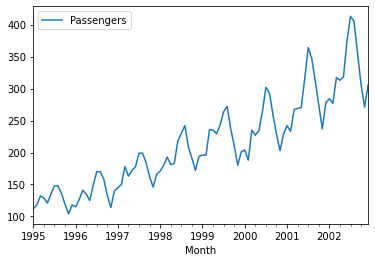

In [6]:
airlines.plot()
pyplot.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DCE660A100>]],
      dtype=object)

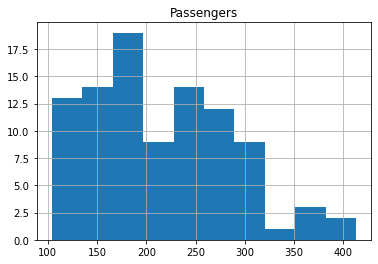

In [7]:
airlines.hist()

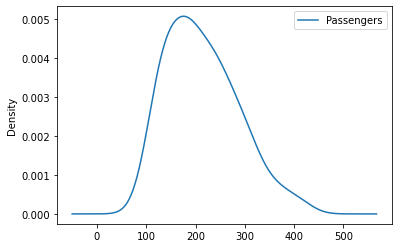

In [8]:
airlines.plot(kind='kde')

In [10]:
split_point = len(airlines) - 10
dataset, validation = airlines[0:split_point], airlines[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 86, Validation 10


In [11]:
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)

In [12]:
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [19]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
    
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)  

>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>Predicted=259.000, Expected=229.000
>

In [31]:
def evaluate_arima_model(X, arima_order):
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    predictions = list()
    
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])

    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [32]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [33]:
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
warnings.filterwarnings("ignore")

In [34]:
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)

In [35]:
X = train.values
X = X.astype('float32')

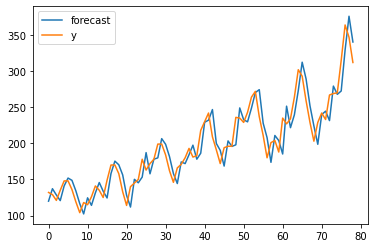

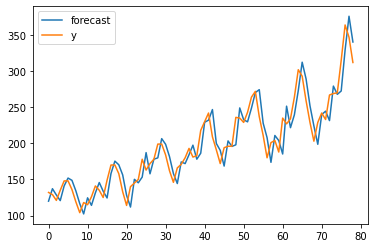

In [51]:
model = ARIMA(X, order=(0,1,1))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 79)

In [37]:
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

71.936960332926

In [40]:
data = pd.read_excel('E:/DataScience/Assignments/Forecasting/AirlinesData.xlsx', header=0, index_col=0, parse_dates=True)

In [41]:
X = train.values
X = X.astype('float32')

In [58]:
model = ARIMA(X, order=(0,1,3))
model_fit = model.fit()

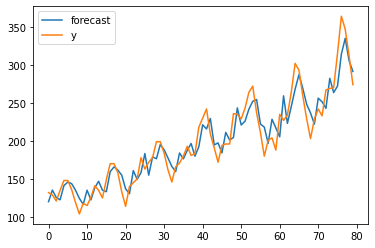

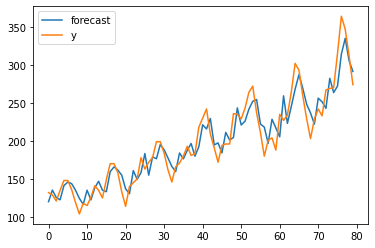

In [59]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,80)

In [61]:
forecast

array([282.13663327, 292.56112328, 295.99728234, 298.12096215,
       300.24464197, 302.36832178, 304.49200159, 306.6156814 ,
       308.73936121, 310.86304102])